Contango -- Long term prices > near term prices  
Backwardation -- Near prices > long term prices

In [ ]:
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [42]:
data = obb.derivatives.futures.curve(symbol="VX")
data

,expiration,price
0,2025-12,17.30
1,2026-01,19.25
2,2026-02,20.20
3,2026-03,20.75
4,2026-04,21.25
5,2026-05,21.55
6,2026-06,21.70
7,2026-07,21.90
8,2026-08,22.00


<Axes: xlabel='expiration'>

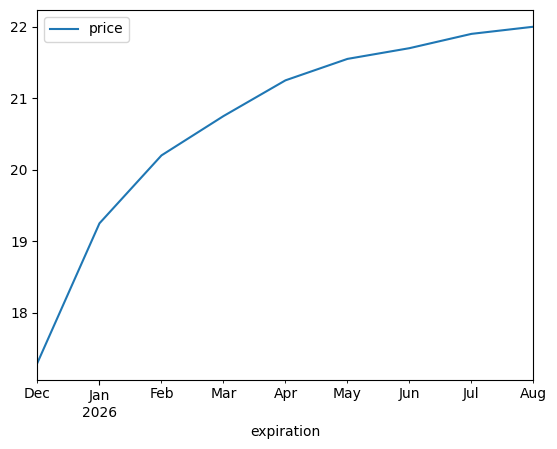

In [6]:
data.index = pd.to_datetime(data.expiration)
data.plot()

You can also get historical futures data

In [31]:
# Need to specify the years and months we're interested in...
expirations = [
    "2024-12",
    "2025-12",
    "2026-12",
    "2027-12",
    "2028-12",
    "2029-12",
    "2030-12",
]

In [57]:
contracts = list()
for expiration in expirations:
    df = obb.derivatives.futures.historical(
        symbol="ETH",
        expiration=expiration,
        start_date="2024-01-01",
        end_date = "2024-12-31"
    ).rename(columns={
        "close": expiration
    })
    contracts.append(df[expiration])

Data is constant because yfinance doesn't work for some reason and there are no futures for the tickers they support (all crypto)

In [58]:
historical = pd.DataFrame(contracts).transpose().dropna()
historical

,2024-12,2025-12,2026-12,2027-12,2028-12,2029-12,2030-12
date,,,,,,,
2023-12-31 08:00:00+00:00,2285.45,2285.45,2285.45,2285.45,2285.45,2285.45,2285.45
2024-01-01 08:00:00+00:00,2389.95,2389.95,2389.95,2389.95,2389.95,2389.95,2389.95
2024-01-02 08:00:00+00:00,2363.30,2363.30,2363.30,2363.30,2363.30,2363.30,2363.30
2024-01-03 08:00:00+00:00,2224.10,2224.10,2224.10,2224.10,2224.10,2224.10,2224.10
2024-01-04 08:00:00+00:00,2255.25,2255.25,2255.25,2255.25,2255.25,2255.25,2255.25
...,...,...,...,...,...,...,...
2024-12-26 08:00:00+00:00,3319.85,3319.85,3319.85,3319.85,3319.85,3319.85,3319.85
2024-12-27 08:00:00+00:00,3329.15,3329.15,3329.15,3329.15,3329.15,3329.15,3329.15
2024-12-28 08:00:00+00:00,3403.00,3403.00,3403.00,3403.00,3403.00,3403.00,3403.00


Getting futures data directly from yahoo finance because openbb's dependency soup is killing me

In [ ]:
import yfinance as yf

contracts = {}

month_map = {
    "12": "Z", "11": "X", "10": "V", "09": "U", "08": "Q",
    "07": "N", "06": "M", "05": "K", "04": "J", "03": "H",
    "02": "G", "01": "F"
}

for expiration in expirations:
    year_full, month = expiration.split("-")
    year = year_full[-2:]
    month_code = month_map[month]

    # Hardcoded the CL ticker here.
    ticker = f"CL{month_code}{year}.NYM"

    print("Fetching", ticker)

    data = yf.download(
        ticker,
        start="2024-01-01",
        end="2024-12-31",
    )

    if data.empty:
        print(f"No data for {ticker}")
        continue

    data = data.rename(columns={"Close": expiration})
    contracts[expiration] = data[expiration]

# Combine into one DataFrame
historical = pd.concat(contracts.values(), axis=1)
print(historical.head())

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CLZ24.NYM']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CLZ25.NYM']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching CLZ24.NYM
No data for CLZ24.NYM
Fetching CLZ25.NYM
No data for CLZ25.NYM
Fetching CLZ26.NYM
Fetching CLZ27.NYM
Fetching CLZ28.NYM
Fetching CLZ29.NYM
Fetching CLZ30.NYM
Ticker      CLZ26.NYM  CLZ27.NYM  CLZ28.NYM  CLZ29.NYM  CLZ30.NYM
Date                                                             
2024-01-02  64.160004  62.689999  61.779999  61.240002  61.029999
2024-01-03  65.209999  63.520000  62.540001  62.000000  61.790001
2024-01-04  64.809998  63.240002  62.299999  61.759998  61.549999
2024-01-05  65.250000  63.540001  62.549999  62.009998  61.799999
2024-01-08  64.190002  62.869999  62.160000  61.750000  61.549999


In [ ]:
historical

Ticker,CLZ26.NYM,CLZ27.NYM,CLZ28.NYM,CLZ29.NYM,CLZ30.NYM
Date,,,,,
2024-01-02,64.160004,62.689999,61.779999,61.240002,61.029999
2024-01-03,65.209999,63.520000,62.540001,62.000000,61.790001
2024-01-04,64.809998,63.240002,62.299999,61.759998,61.549999
2024-01-05,65.250000,63.540001,62.549999,62.009998,61.799999
2024-01-08,64.190002,62.869999,62.160000,61.750000,61.549999
...,...,...,...,...,...
2024-12-23,64.559998,63.470001,62.770000,62.279999,61.820000
2024-12-24,65.029999,63.860001,63.110001,62.599998,62.110001
2024-12-26,64.739998,63.570000,62.849998,62.360001,61.869999


<Axes: xlabel='Ticker'>

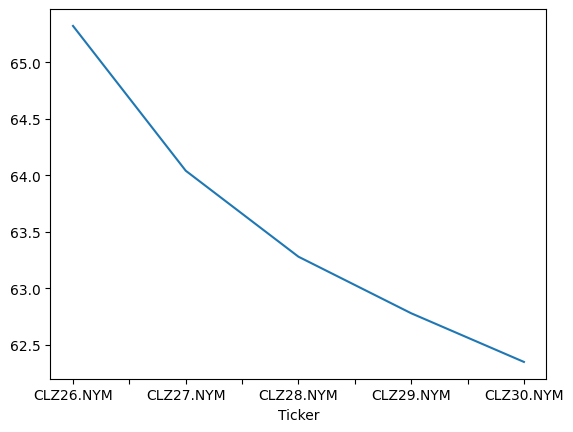

In [ ]:
historical.iloc[-1].plot()

In [ ]:
cl_front = yf.download("CL=F", start="2020-01-01", end="2024-12-31")
cl_front

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2020-01-02,61.180000,61.599998,60.639999,61.599998,486873
2020-01-03,63.049999,64.089996,61.130001,61.180000,885861
2020-01-06,63.270000,64.720001,62.639999,63.709999,724236
2020-01-07,62.700001,63.150002,62.110001,62.910000,582649
2020-01-08,59.610001,65.650002,59.150002,62.840000,1205710
...,...,...,...,...,...
2024-12-23,69.239998,69.940002,68.589996,69.400002,188843
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602
